In [2]:
# Getting data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
import seaborn as sns
style.use("ggplot")

data = pd.read_csv('excel for HLCL.csv')
datavis = data
print(datavis.columns)

Index(['Relative compactness', 'Surface area', 'Wall area', 'Roof area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')


In [3]:
# Data Exploration as per research paper "Accurate quantitative estimation of energy performance of residential using statistical machine learning tools Athanasios Tsanasa,∗, Angeliki Xifarab"

# Normalizing the data as per research paper section-3.1
from sklearn import preprocessing

datavis = datavis.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
datavis_scaled = min_max_scaler.fit_transform(datavis)
datavis = pd.DataFrame(datavis_scaled)
datavis

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

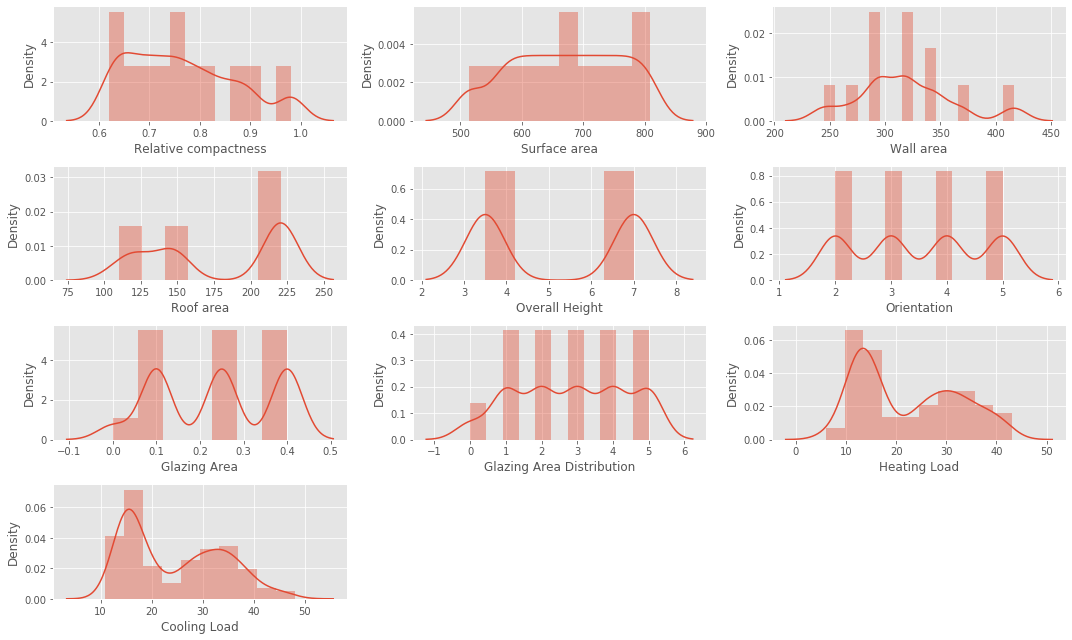

In [4]:
# Visualizing the entire dataset
fig = plt.figure(figsize=(15,9))
for a,b in enumerate(data.columns):
  ax = fig.add_subplot(4,3,a+1)
  sns.distplot(data[b])
plt.tight_layout()

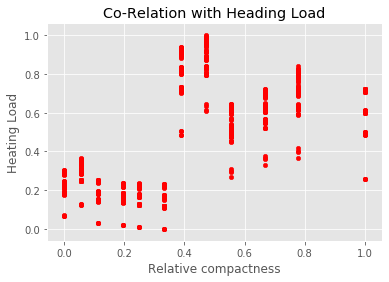

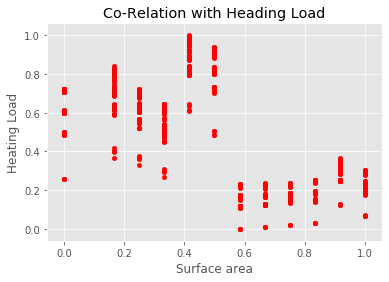

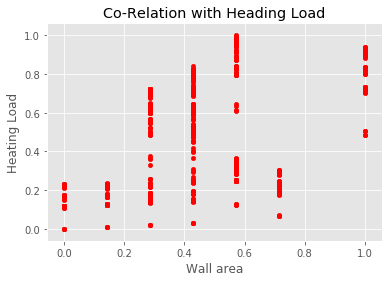

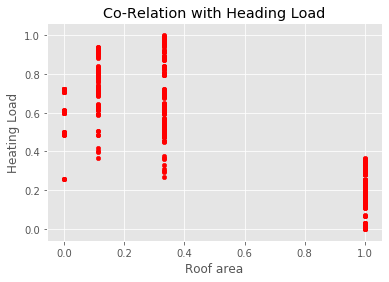

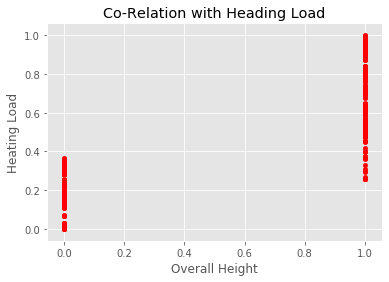

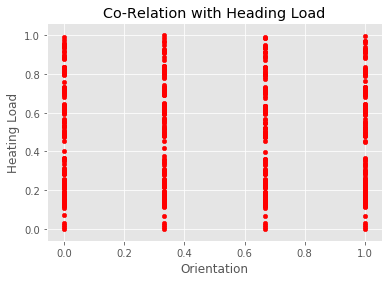

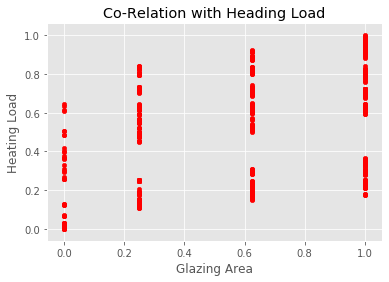

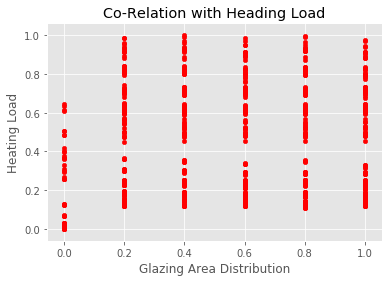

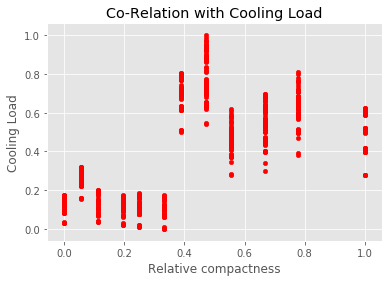

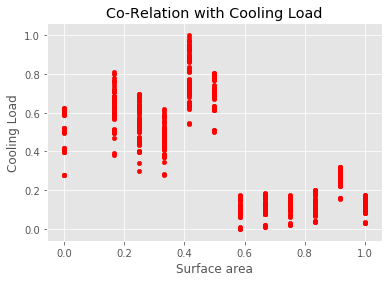

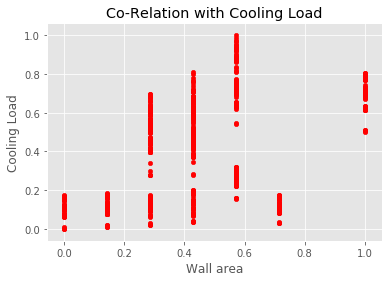

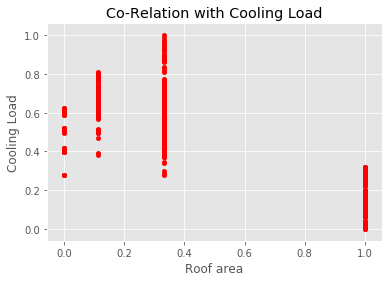

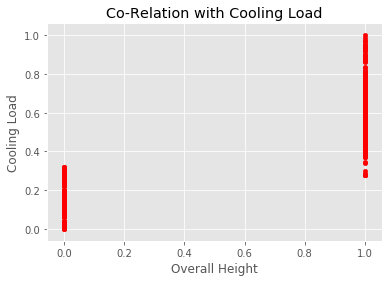

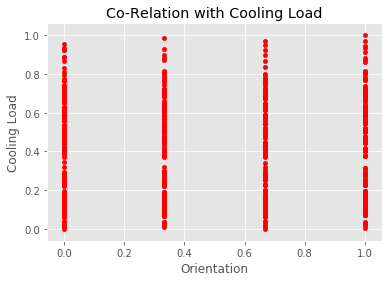

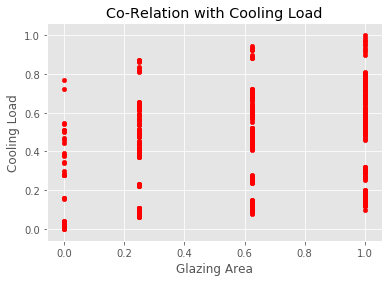

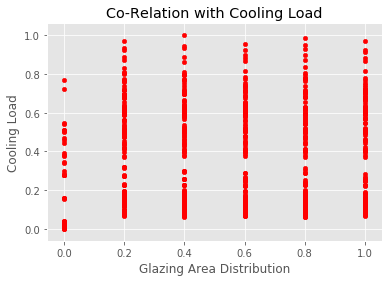

In [5]:
# Visualizing the input variable with relation with output variable
# Plotting each input variable with each output variable

# For Heating Load
x_labels = ['Relative compactness', 'Surface area', 'Wall area', 'Roof area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution']
data_new = datavis.drop([8,9], axis=1) # Only has input variables

for i in data_new.columns:
  ax = datavis.plot(kind='scatter',x=i,y=8, color='red', title='Co-Relation with Heading Load')
  ax.set_xlabel(x_labels[i])
  ax.set_ylabel('Heating Load')
  plt.show()

# For Cooling Heat
for i in data_new.columns:
  ax = datavis.plot(kind='scatter',x=i,y=9, color='red', title='Co-Relation with Cooling Load')
  ax.set_xlabel(x_labels[i])
  ax.set_ylabel('Cooling Load')
  plt.show()



In [6]:
# Correlation Between Input Variable And Output variable

In [7]:

# I. Spearman Co-Relation between each input variable and each output variable

# The Spearman rank correlation coefficient can characterize
# general monotonic relationships and lies in the range
# −1 to 1, 
# where negative sign indicates inversely proportional and 
# positive sign indicates proportional relationship, whilst the magnitude
# denotes how strong this relationship
from scipy import stats
ls = max(x_labels, key=len)
# For Heating Load
heat_load_sp = []
for i in x_labels:
  rank_corr = stats.spearmanr(data[i], data['Heating Load'])
  heat_load_sp.append(rank_corr)

print('1. If the correlation is closer to 1 or +ve, it is directly proportional to the output variable(heatload).')
print('2. If the correaltion is closer to -1 or -ve, it is inversely proporational to the output variable(heatload).')
print(' ')
for a,b in enumerate(x_labels):
  print(b.rjust(len(ls))+" -->   "+str(heat_load_sp[a]))
print(' ')
# For Cooling Load
cool_load_sp = []
for i in x_labels:
  rank_corr = stats.spearmanr(data[i], data['Cooling Load'])
  cool_load_sp.append(rank_corr)

print('1. If the correlation is closer to 1 or +ve, it is directly proportional to the output variable(coolload).')
print('2. If the correaltion is closer to -1 or -ve, it is inversely proporational to the output variable(coolload).')
print(' ')
for a,b in enumerate(x_labels):
  print(b.rjust(len(ls))+" -->   "+str(cool_load_sp[a]))



1. If the correlation is closer to 1 or +ve, it is directly proportional to the output variable(heatload).
2. If the correaltion is closer to -1 or -ve, it is inversely proporational to the output variable(heatload).
 
     Relative compactness -->   SpearmanrResult(correlation=0.6221346966316251, pvalue=1.771224007588849e-83)
             Surface area -->   SpearmanrResult(correlation=-0.6221346966316251, pvalue=1.771224007588849e-83)
                Wall area -->   SpearmanrResult(correlation=0.47145765013625385, pvalue=9.35921624703249e-44)
                Roof area -->   SpearmanrResult(correlation=-0.8040270001230636, pvalue=4.039675429457876e-175)
           Overall Height -->   SpearmanrResult(correlation=0.8612825770633121, pvalue=1.9889999738567618e-227)
              Orientation -->   SpearmanrResult(correlation=-0.004163070656793656, pvalue=0.9083000894361577)
             Glazing Area -->   SpearmanrResult(correlation=0.32286032044187585, pvalue=4.320873373884024e-20)
Glazi

In [8]:
# II. Mutual Information(normalized) 

# 1. MI can be used to quantify any arbitrary relationships between the input and output variables.
# 2. Because MI is not upper bounded we normalize it to lie in the range [0 to 1]
# 3. The larger the MI value, the stronger the association strength between the two variables 

# Note - The MI value may not matched with the MI values in the research paper but the difference is the same so 
# there is nothing to worry about still MI gives the same difference as in the research paper

# for heating load
ls = max(x_labels, key=len) # maximum string length for padding
from sklearn.metrics import normalized_mutual_info_score
heat_load_mi = []
for i in x_labels:
  mi = normalized_mutual_info_score(data[i],data['Heating Load'])
  heat_load_mi.append(mi)

print('Heating Load MI: \n')
for a,b in enumerate(x_labels):
  print(b.rjust(len(ls))+"  -->   "+str(heat_load_mi[a]))

print(' ')

# for cooling head
from sklearn.metrics import normalized_mutual_info_score
cool_load_mi = []
for i in x_labels:
  mi = normalized_mutual_info_score(data[i],data['Cooling Load'])
  cool_load_mi.append(mi)

print('Cooling Load MI: \n')

for a,b in enumerate(x_labels):
  
  print(b.rjust(len(ls))+"  -->  "+str(cool_load_mi[a]))


Heating Load MI: 

     Relative compactness  -->   0.5315997942465793
             Surface area  -->   0.5315997942465793
                Wall area  -->   0.4127854670886174
                Roof area  -->   0.3104905792355469
           Overall Height  -->   0.19895072377933348
              Orientation  -->   0.2939311962680667
             Glazing Area  -->   0.3042815104433926
Glazing Area Distribution  -->   0.36930854888557246
 
Cooling Load MI: 

     Relative compactness  -->  0.5248857880601706
             Surface area  -->  0.5248857880601706
                Wall area  -->  0.40892889102711927
                Roof area  -->  0.3042412921399664
           Overall Height  -->  0.1957637401973597
              Orientation  -->  0.31093013178547113
             Glazing Area  -->  0.3149630923297538
Glazing Area Distribution  -->  0.3819557116968001


In [9]:
# Visualizing all Correlations 
# For Heat Load
coh = []
ph = []
for i in range(len(heat_load_sp)):
  cof,pv = heat_load_sp[i]
  coh.append(cof)
  ph.append(pv)
coframe_heat_dict = {'InputVariable':x_labels, 'MutualInformaiton(normalized)':heat_load_mi, 'SpearmanrCorrelaitonCoefficients':coh, 'pvalue':["%.4f"%(i) for i in ph]}
coframe_heat = pd.DataFrame(coframe_heat_dict)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# For Cool Load
coc = []
pc = []
for i in range(len(cool_load_sp)):
  cof,pv = cool_load_sp[i]
  coc.append(cof)
  pc.append(pv)
coframe_cool_dict = {'InputVariable':x_labels, 'MutualInformaiton(normalized)':cool_load_mi, 'SpearmanrCorrelaiton Coefficients':coc, 'pvalue':["%.4f"%(i) for i in pc]}
coframe_cool = pd.DataFrame(coframe_cool_dict)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [10]:
# Heating Load Correlation Dataframe
coframe_heat

,InputVariable,MutualInformaiton(normalized),SpearmanrCorrelaitonCoefficients,pvalue
0,Relative compactness,0.531600,0.622135,0.0000
1,Surface area,0.531600,-0.622135,0.0000
2,Wall area,0.412785,0.471458,0.0000
3,Roof area,0.310491,-0.804027,0.0000
4,Overall Height,0.198951,0.861283,0.0000
5,Orientation,0.293931,-0.004163,0.9083
6,Glazing Area,0.304282,0.322860,0.0000
7,Glazing Area Distribution,0.369309,0.068343,0.0583


In [11]:
# Cooling Load Correlation Visualization
coframe_cool

,InputVariable,MutualInformaiton(normalized),SpearmanrCorrelaiton Coefficients,pvalue
0,Relative compactness,0.524886,0.651019,0.0000
1,Surface area,0.524886,-0.651019,0.0000
2,Wall area,0.408929,0.415991,0.0000
3,Roof area,0.304241,-0.803175,0.0000
4,Overall Height,0.195764,0.864876,0.0000
5,Orientation,0.310930,0.017606,0.6262
6,Glazing Area,0.314963,0.288904,0.0000
7,Glazing Area Distribution,0.381956,0.046477,0.1982


In [12]:
# Splitting the data into input and output variables
X = datavis.iloc[:,:-2].values
y1 = datavis.iloc[:,-2].values
y2 = datavis.iloc[:,-1].values
print(X.shape, y1.shape)
print(X.shape, y2.shape)

(768, 8) (768,)
(768, 8) (768,)


# Explanation of variables
X -> Input Variables (8)
y1 -> Heat Load Output Variable
y2 -> Cool Load Output Variable

In [13]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y1_train.shape)
print(y1_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)
(537,)
(231,)


# I.  Model - Random Forest Regressor with 300 estimators

In [14]:
from sklearn.ensemble import RandomForestRegressor
# for heat load
model_heatload = RandomForestRegressor(n_estimators=300, random_state=42)
model_heatload.fit(X_train, y1_train)
# for cool load
model_coolload = RandomForestRegressor(n_estimators=300, random_state=42)
model_coolload.fit(X_train, y2_train)
print("Model is trained...")

Model is trained...


In [15]:
# Predictions on dataset
y1_pred = model_heatload.predict(X_test) # Heat Load Predicion
y2_pred = model_coolload.predict(X_test) # Cool Load Prediction

In [16]:
# r2 score evalution
from sklearn.metrics import r2_score
score_heat = r2_score(y1_test, y1_pred)
score_cool = r2_score(y2_test, y2_pred)
print("R2 Score for Heating Load ->", score_heat)
print("R2 Score for Cooling Load ->",score_cool)

R2 Score for Heating Load -> 0.9976206040942
R2 Score for Cooling Load -> 0.9697632991249175


# Explanation About the Plot
1. From Heat Load prediction curve, we can state that the model predictions are much more relevant as it fits the data with a 45° as expected.
2. From Cool Load prediction curve, we can state the same that model predictions are much more relevant as it fits the data with a 45° as expected.

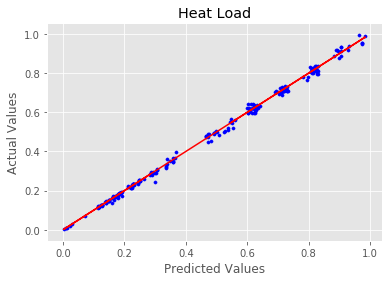

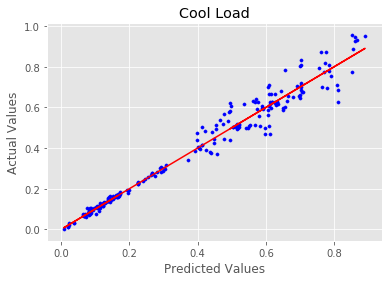

In [17]:
# Plotting the curve for predicted and actual values
# For Heat Load
plt.scatter(y1_pred, y1_test, c='blue', s=10)
plt.plot(y1_pred, model_heatload.predict(X_test), color='red')
plt.title('Heat Load')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
# For Cool Load
plt.scatter(y2_pred, y2_test, c='blue', s=10)
plt.plot(y2_pred, model_coolload.predict(X_test), color='red')
plt.title('Cool Load')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# II. Model - Convolutional Neural Network

In [18]:
# Importing necessary libraries
import tensorflow as tf
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [19]:
# defining our base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [20]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

## **Note** - Model training might takes time depending upon the configuration of machine

In [ ]:
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y1_train, cv=kfold)

In [ ]:
print("Baseline: %.9f (%.9f) MSE" % (results.mean(), results.std()))

# Feature Selection using Genetic Algorithm
Refer to https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
for further assistance.

In [ ]:
#defining various steps required for the genetic algorithm
import random
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        model_heatload.fit(X_train[:,chromosome],y2_train)
        predictions = model_heatload.predict(X_test[:,chromosome])
        scores.append(r2_score(y2_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
# Running Genetic Algorithm
chromo,score=generations(size=1000,n_feat=8,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train,X_test=X_test,y_train=y1_train,y_test=y1_test)

model_heatload.fit(X_train[:,chromo[-1]],y2_train)
predictions = model_heatload.predict(X_test[:,chromo[-1]])
print("R2 score after genetic algorithm is= "+str(r2_score(y2_test,predictions)))

[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278968, 0.8860320376278968]
[0.8860320376278